In [1]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('C:/Users/Choug/Desktop/DATA ANALYTICS/candy-data.csv')

In [3]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


## Exploring the correlation between Pricepercent and characteristics

In [4]:
sort = df[['competitorname', 'pricepercent', 'sugarpercent', 'winpercent']]

In [5]:
sort.sort_values(['pricepercent'], ascending=False)

,competitorname,pricepercent,sugarpercent,winpercent
62,Nestle Smarties,0.976,0.267,37.887188
44,Nik L Nip,0.976,0.197,22.445341
55,Ring pop,0.965,0.732,35.290756
23,HersheyÕs Krackel,0.918,0.430,62.284481
40,Mr Good Bar,0.918,0.313,54.526451
...,...,...,...,...
69,Strawberry bon bons,0.058,0.569,34.578991
15,Fruit Chews,0.034,0.127,43.088924
14,Dum Dums,0.034,0.732,39.460556
48,Pixie Sticks,0.023,0.093,37.722336


In [6]:
df.isnull().any()

competitorname      False
chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool

In [7]:
rig = df[['pricepercent', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
               'hard', 'bar', 'pluribus']]

In [8]:
rig

,pricepercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,0.860,1,0,1,0,0,1,0,1,0
1,0.511,1,0,0,0,1,0,0,1,0
2,0.116,0,0,0,0,0,0,0,0,0
3,0.511,0,0,0,0,0,0,0,0,0
4,0.511,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80,0.116,0,1,0,0,0,0,0,0,0
81,0.116,0,1,0,0,0,0,1,0,0
82,0.313,0,1,0,0,0,0,0,0,1
83,0.267,0,0,1,0,0,0,1,0,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


In [10]:
y, X = dmatrices('pricepercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus', data=rig, return_type='dataframe')

In [11]:
y[:3]

,pricepercent
0,0.860
1,0.511
2,0.116


In [12]:
X[:3]

,Intercept,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mod = sm.OLS(y, X)

In [14]:
res = mod.fit()

In [15]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           pricepercent   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     5.293
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.41e-05
Time:                        18:07:46   Log-Likelihood:                 7.2685
No. Observations:                  85   AIC:                             5.463
Df Residuals:                      75   BIC:                             29.89
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2776      0.089  

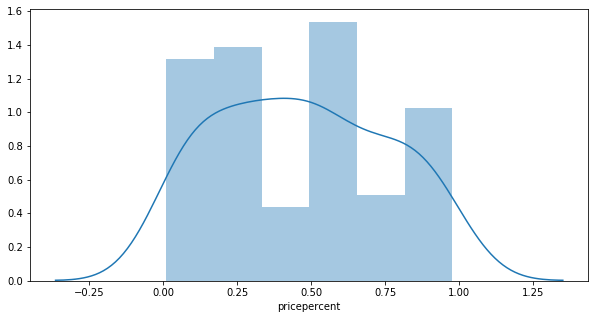

In [16]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(df['pricepercent'])

In [17]:
avg = df.loc[df.chocolate==1, :]

In [18]:
avg.pricepercent.mean()

0.6321621654594596